# Getting a Good Night's Sleep

![insomnia](insomnia.jpg)


Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

## Overview

We have a dataset collected from surveys of an app called **SleepScore**, which is a sleep tracking app. The dataset has a shape of (374, 13).

### Objective

Our goal is to discover relationships between the following variables:
- Exercise
- Gender
- Occupation
- Sleep Quality

We aim to uncover insightful patterns that can help us understand how these factors influence sleep quality.

In [189]:
# Importing needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [190]:
# Loading and reading the dataset
dataset_path = "sleep_health_data.csv"
df = pd.read_csv(dataset_path)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [191]:
#Shape of the data 
df.shape

(374, 13)

In [192]:
#Some infos about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [193]:
#Some stats about the data (only numeric cols )
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [194]:
#Checking for missing values 
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [195]:
#Number of unique values in each column in the dataframe
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 3
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [196]:
# Rounding 'Physical Activity Level' to the nearest 5 minutes
df['Physical Activity Level'] = df['Physical Activity Level'].apply(lambda x: round(x / 5) * 5)

## Exploratory Data Analysis

### Univariate Analysis

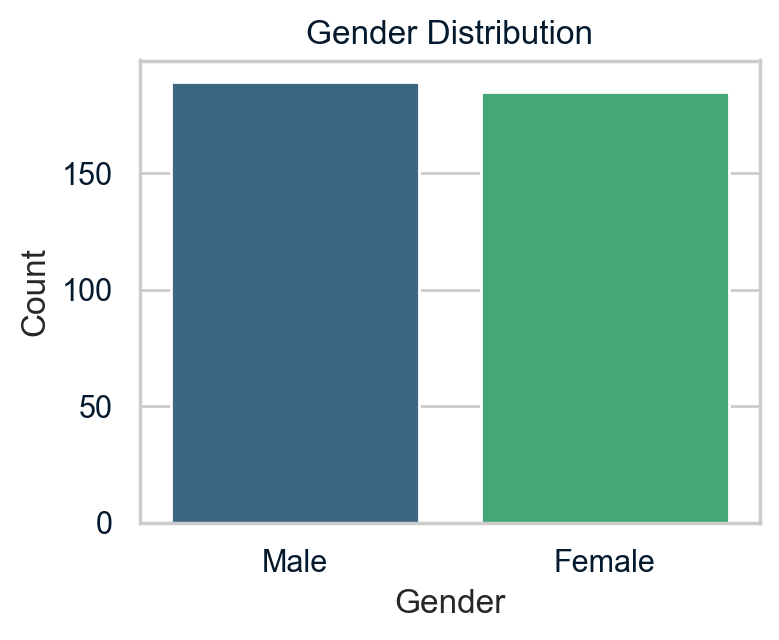

In [197]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for gender distribution
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Gender', palette='viridis')

# Add title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

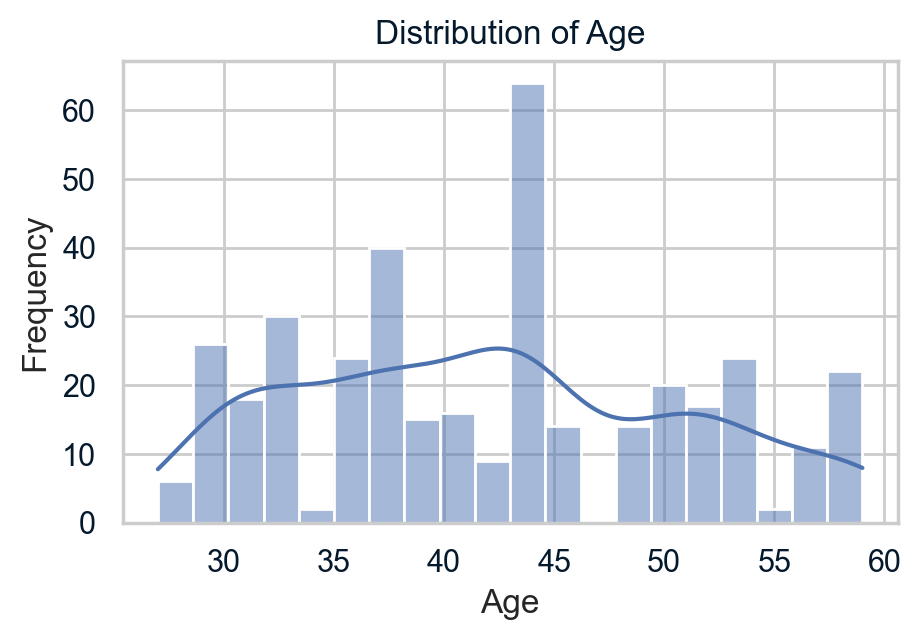

In [198]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(5, 3))

# Plot the distribution of the 'Age' column
sns.histplot(df['Age'], bins=20, kde=True)

# Add titles and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

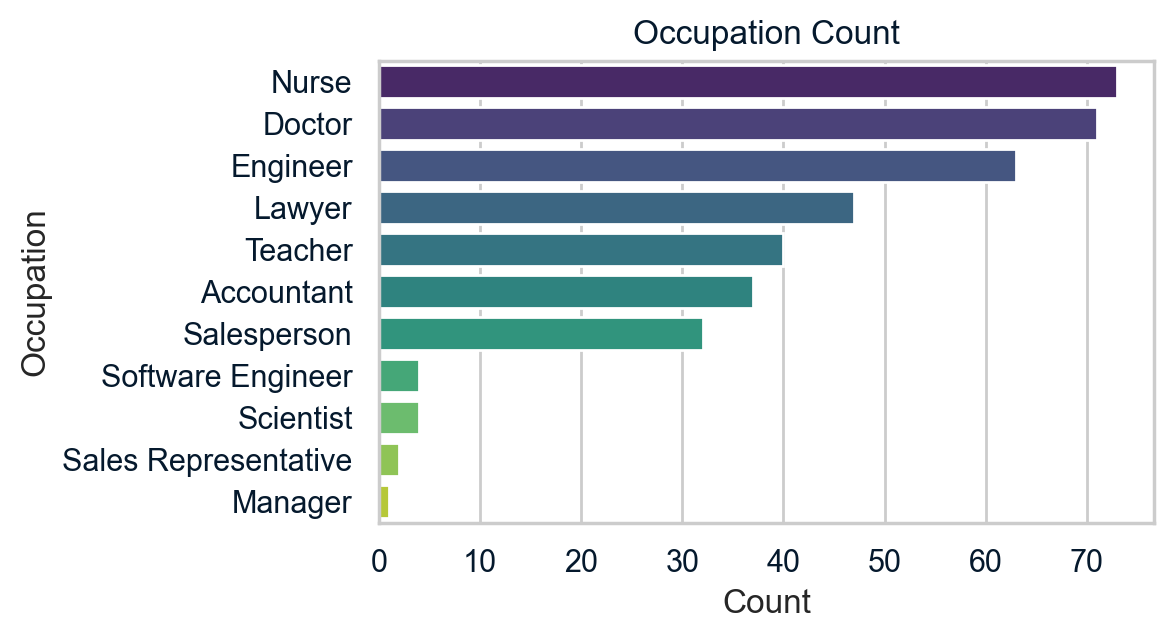

In [199]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for occupation count
plt.figure(figsize=(5, 3))
sns.countplot(data=df, y='Occupation', palette='viridis', order=df['Occupation'].value_counts().index)

# Add title and labels
plt.title('Occupation Count')
plt.xlabel('Count')
plt.ylabel('Occupation')

# Show the plot
plt.show()

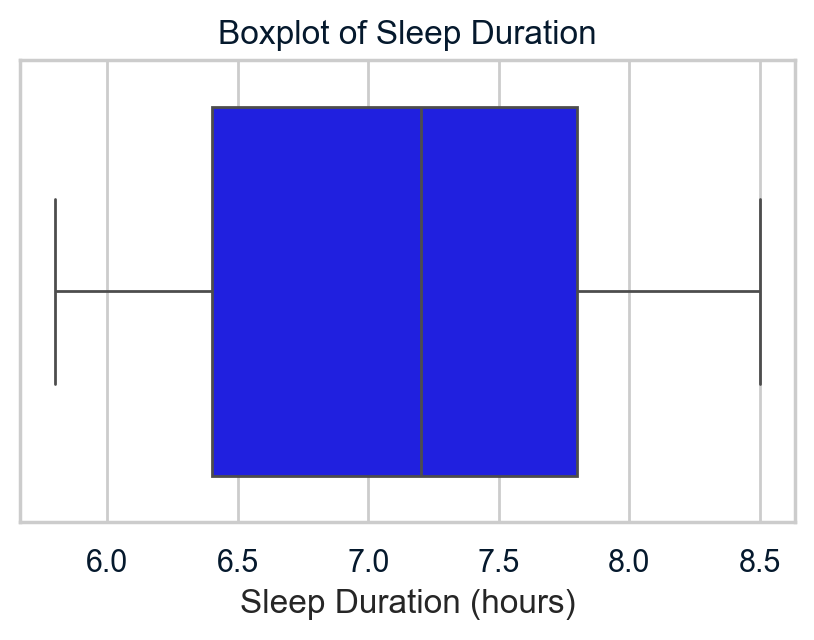

In [200]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure for the boxplot
plt.figure(figsize=(5, 3))

# Plot the distribution of the 'Sleep Duration' column using a boxplot
sns.boxplot(data=df, x='Sleep Duration', color='blue')

# Add title and labels
plt.title('Boxplot of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')

# Show the plot
plt.show()

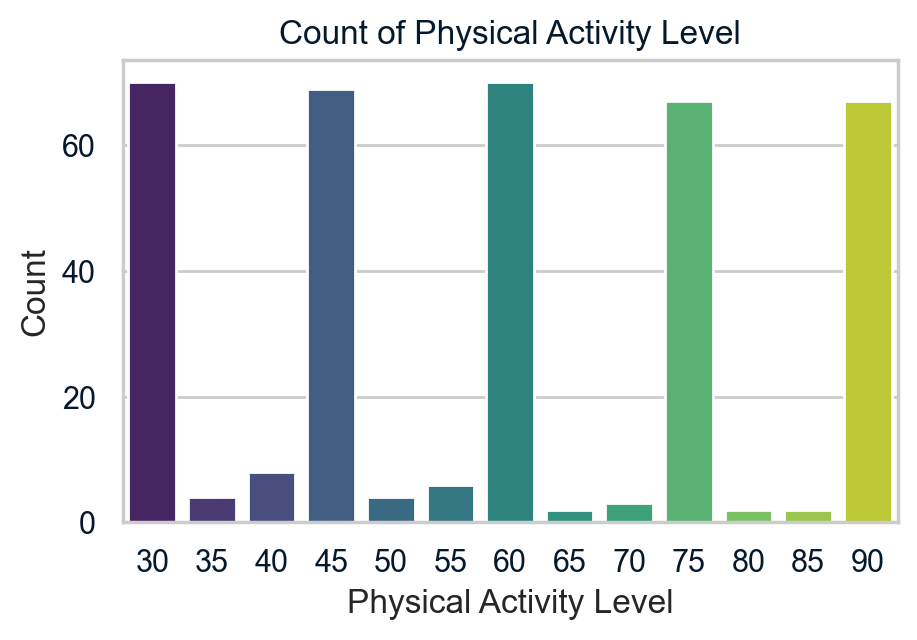

In [201]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure for the bar plot
plt.figure(figsize=(5, 3))

# Plot the distribution of the 'Physical Activity Level' column using a bar plot
sns.countplot(data=df, x='Physical Activity Level', palette='viridis')

# Add title and labels
plt.title('Count of Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')

# Show the plot
plt.show()

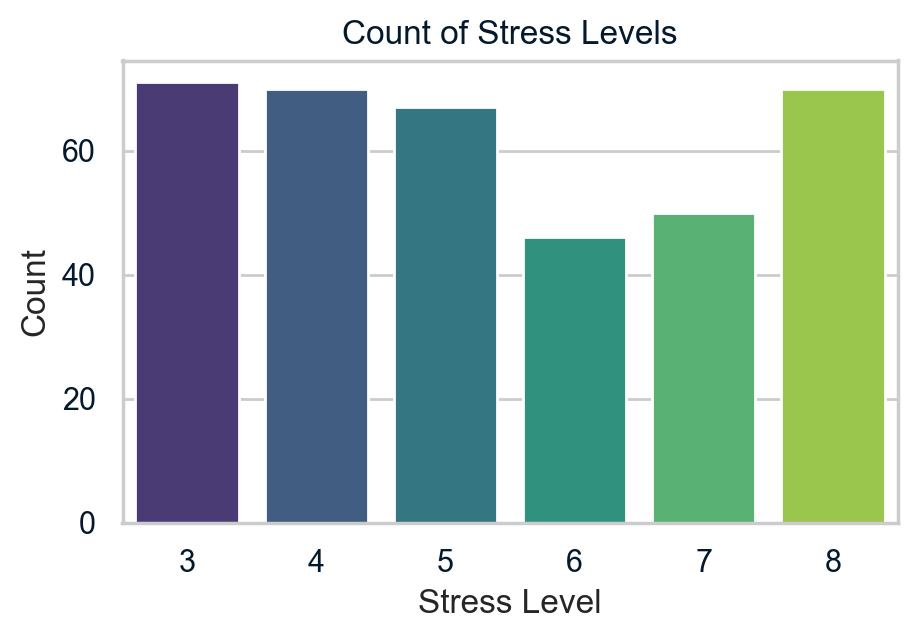

In [202]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure for the bar plot
plt.figure(figsize=(5, 3))

# Plot the distribution of the 'Stress Level' column using a bar plot
sns.countplot(data=df, x='Stress Level', palette='viridis')

# Add title and labels
plt.title('Count of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')

# Show the plot
plt.show()

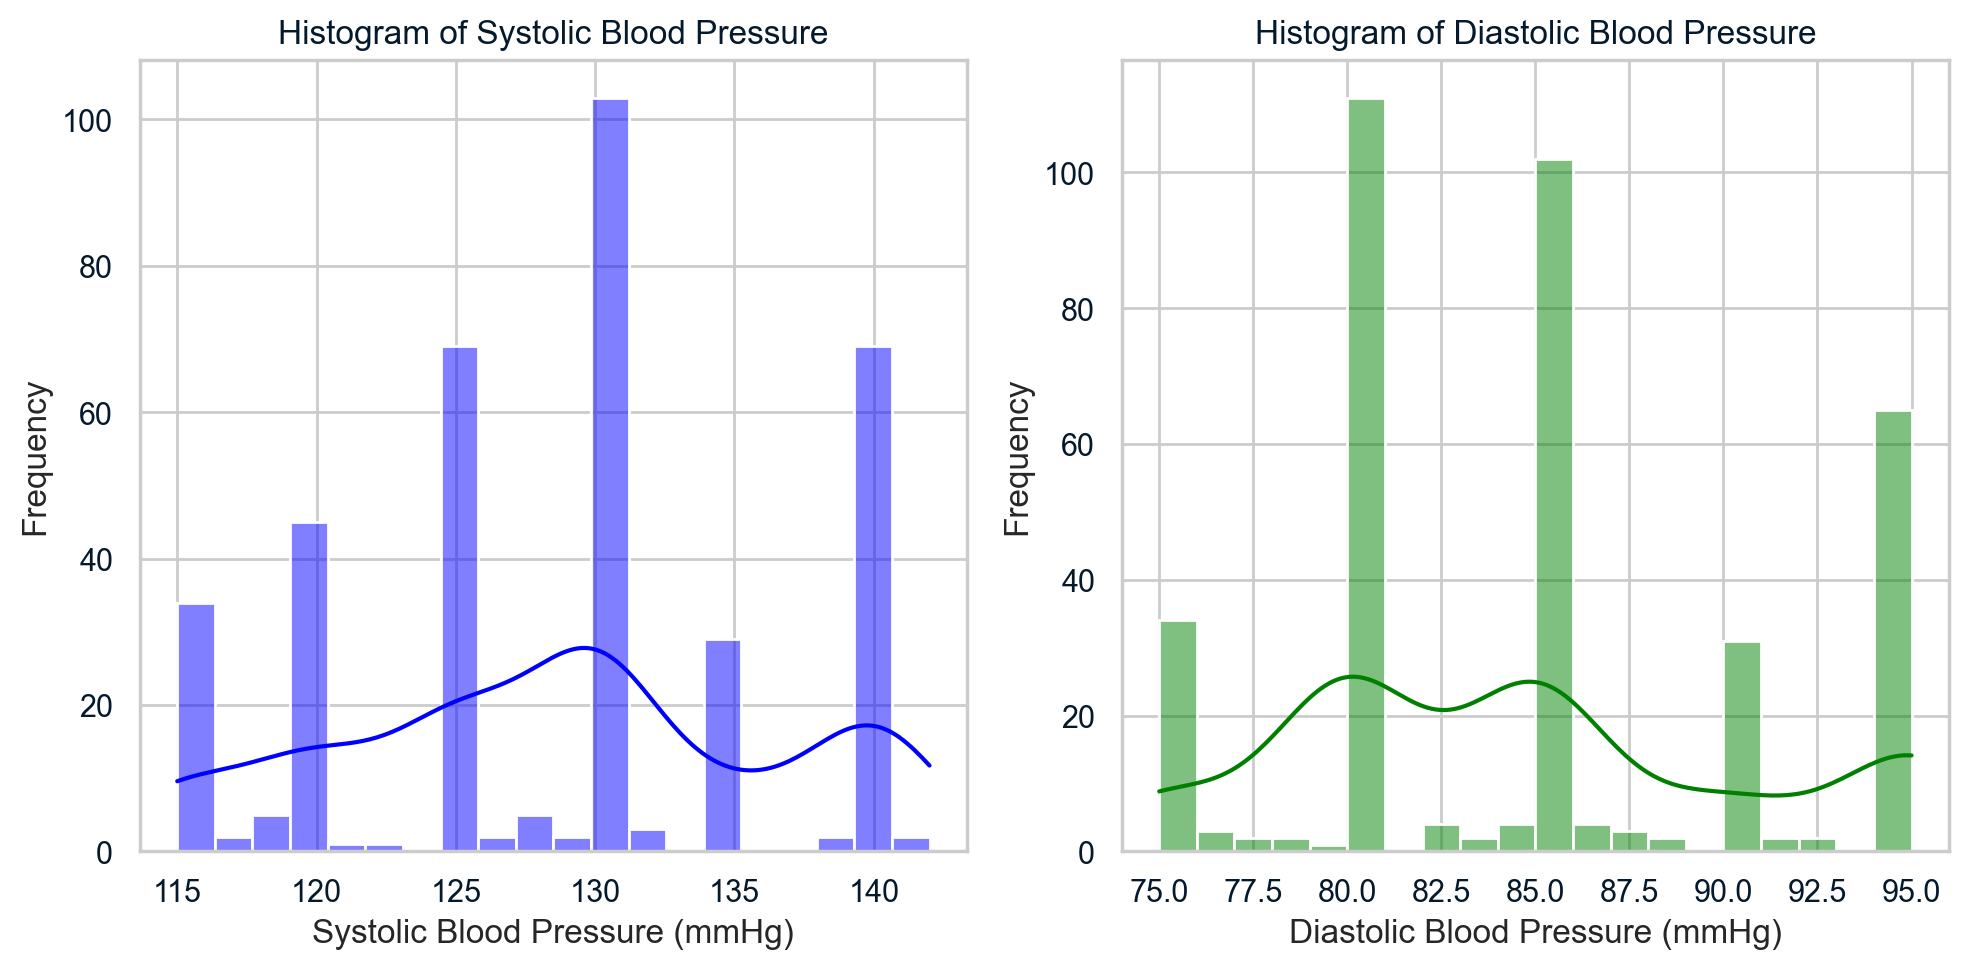

In [203]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure for the histograms
plt.figure(figsize=(10, 5))

# Split the 'Blood Pressure' column into 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Plot the distribution of the 'Systolic' blood pressure using a histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Systolic'], bins=20, kde=True, color='blue')
plt.title('Histogram of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')

# Plot the distribution of the 'Diastolic' blood pressure using a histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Diastolic'], bins=20, kde=True, color='green')
plt.title('Histogram of Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

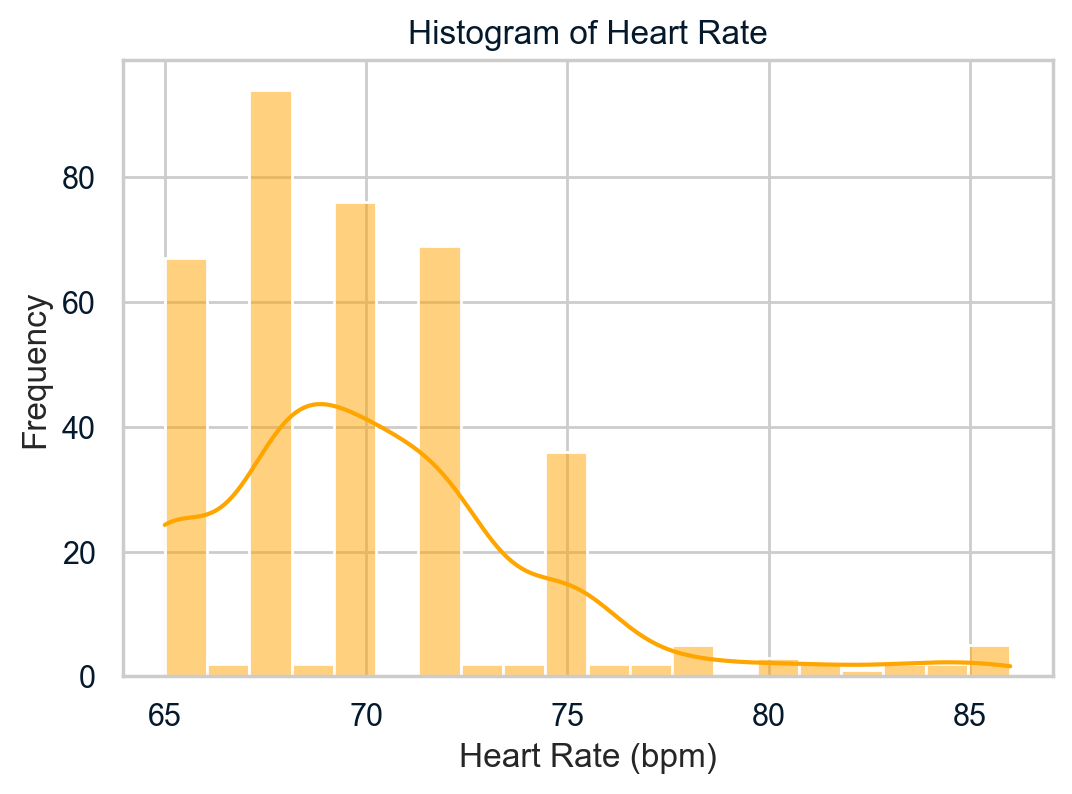

In [204]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure for the histogram
plt.figure(figsize=(6, 4))

# Plot the distribution of the 'Heart Rate' using a histogram
sns.histplot(df['Heart Rate'], bins=20, kde=True, color='orange')

# Add title and labels
plt.title('Histogram of Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

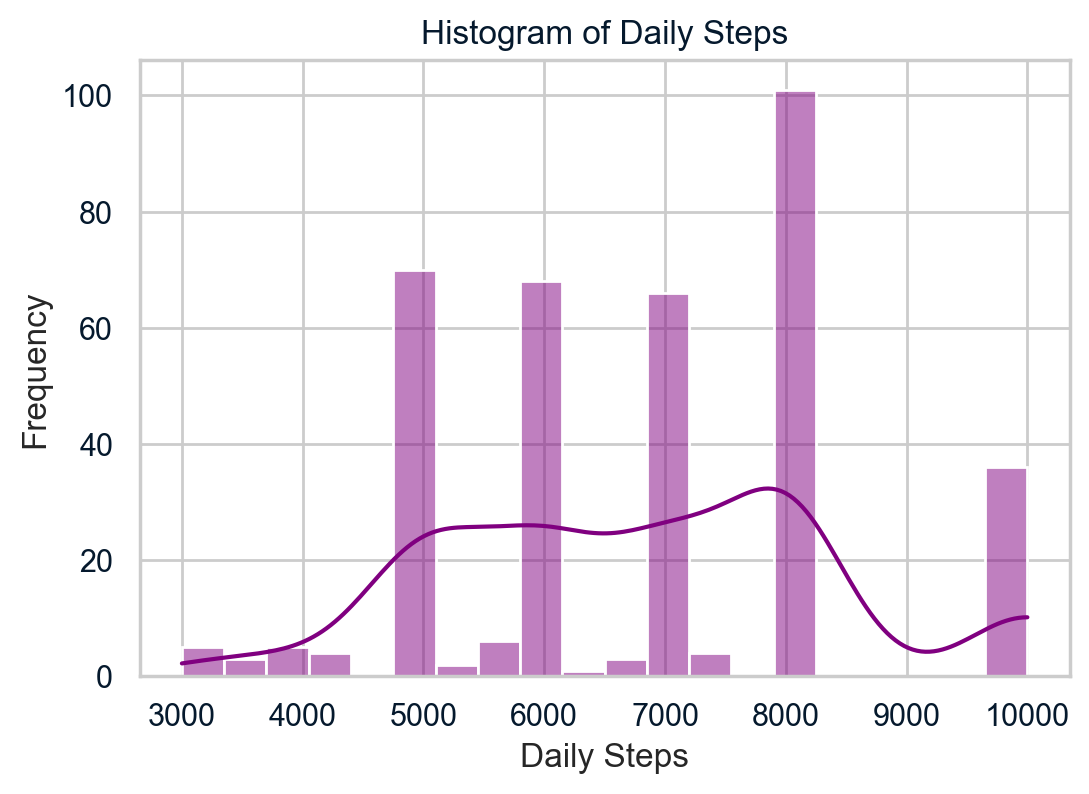

In [205]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure for the histogram
plt.figure(figsize=(6, 4))

# Plot the distribution of the 'Daily Steps' using a histogram
sns.histplot(df['Daily Steps'], bins=20, kde=True, color='purple')

# Add title and labels
plt.title('Histogram of Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')

# Show the plot
plt.show()

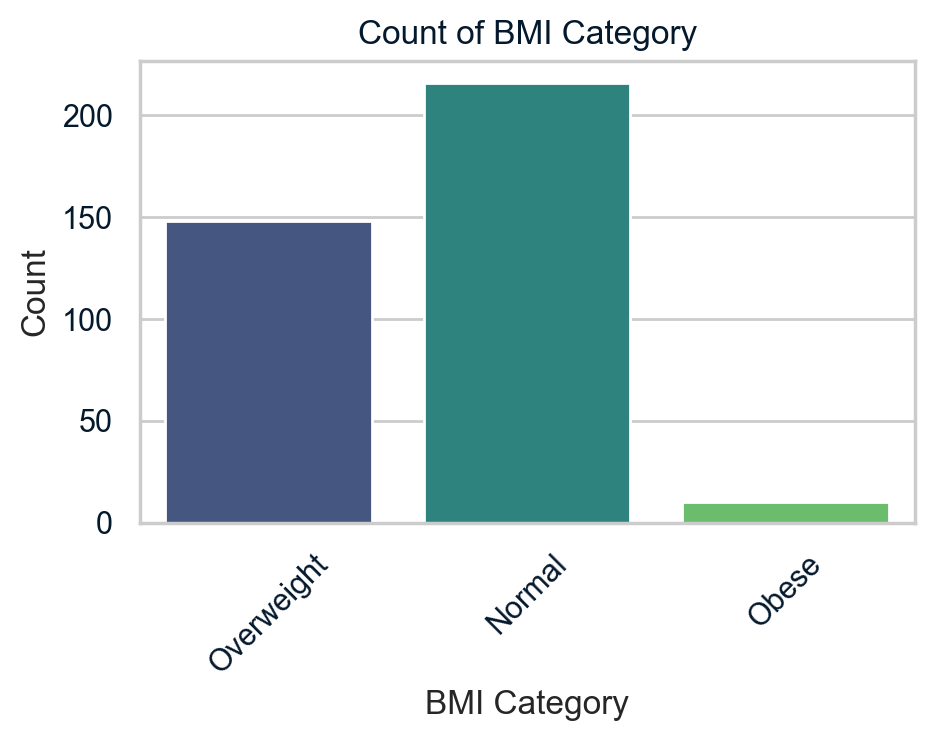

In [206]:
# Plotting the count of BMI Category
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='BMI Category', palette='viridis')
plt.title('Count of BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

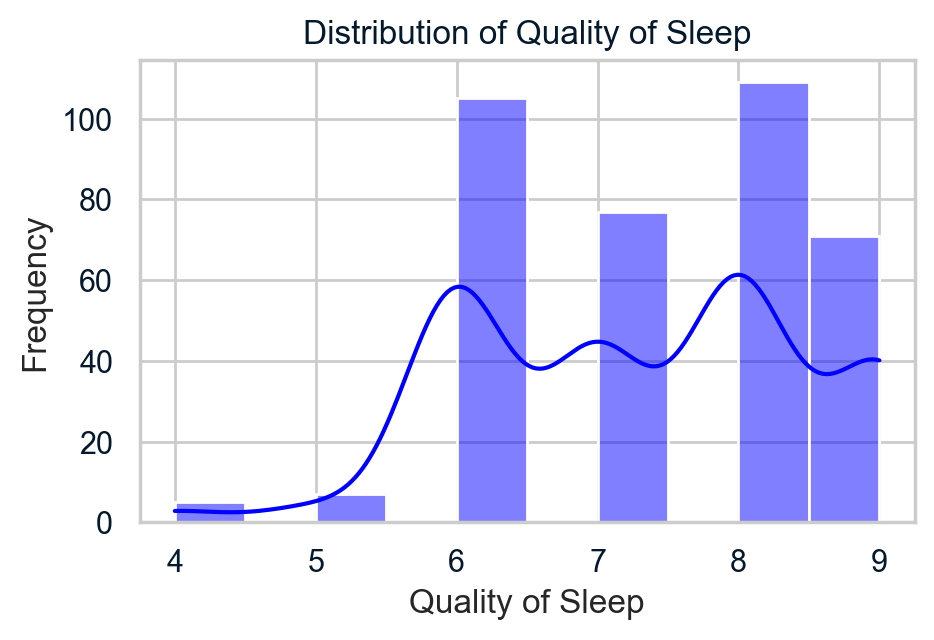

In [207]:
# Plotting the distribution of Quality of Sleep
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='Quality of Sleep', bins=10, kde=True, color='blue')
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

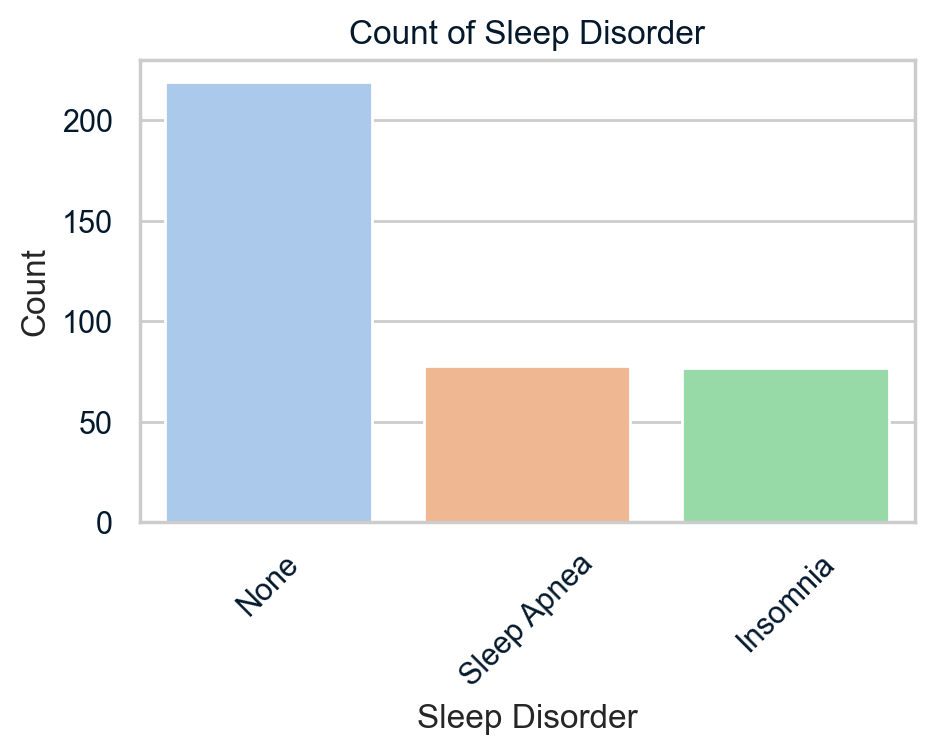

In [208]:
# Plotting the count of Sleep Disorder
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Sleep Disorder', palette='pastel')
plt.title('Count of Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis

**Quality of Sleep vs. Sleep Duration**

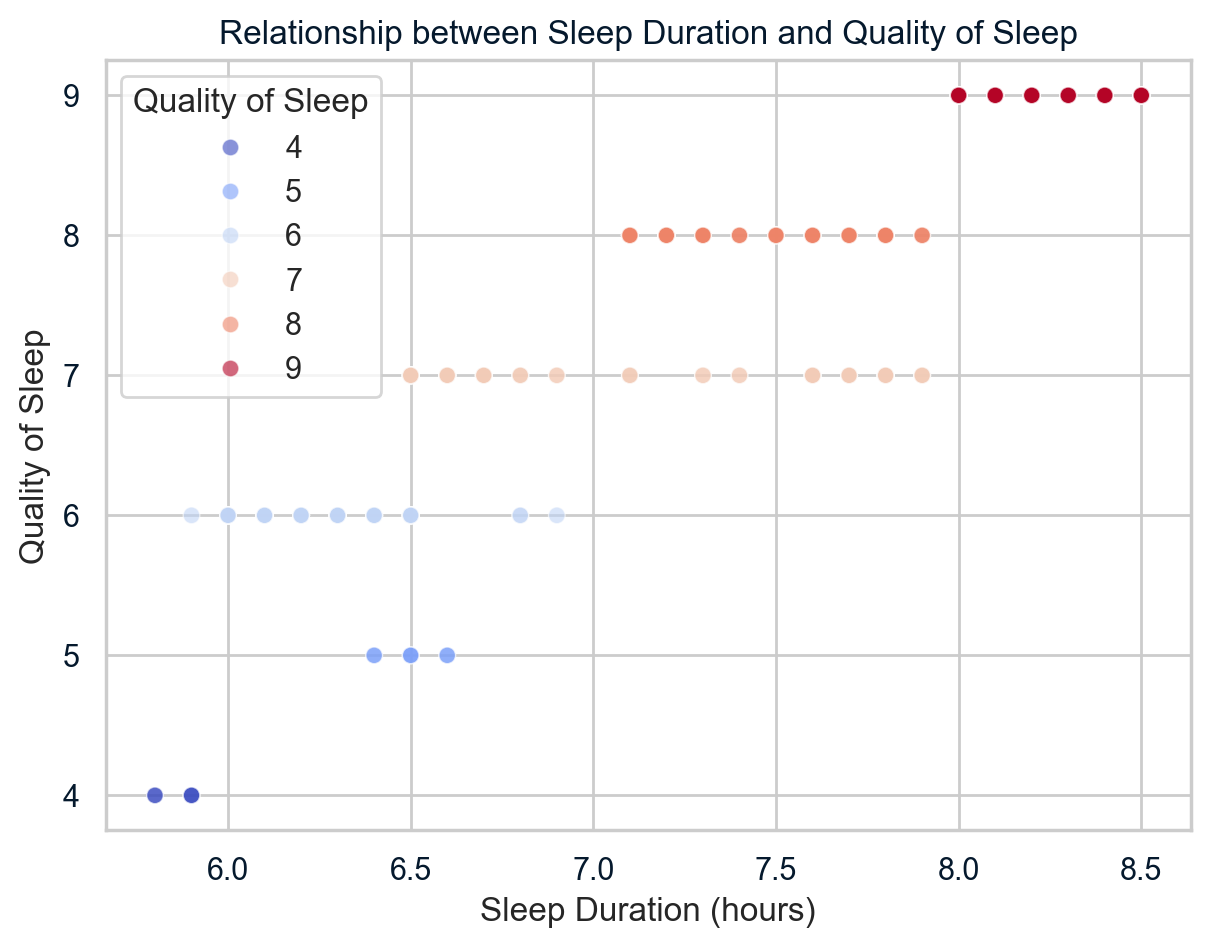

0.8832130004106171

In [209]:
# Scatter plot to see the relationship between Sleep Duration and Quality of Sleep
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep', hue='Quality of Sleep', palette='coolwarm', alpha=0.6)
plt.title('Relationship between Sleep Duration and Quality of Sleep')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep')
plt.show()

# Calculating the correlation between Sleep Duration and Quality of Sleep
correlation = df['Sleep Duration'].corr(df['Quality of Sleep'])
correlation

**Analysis of Quality of Sleep vs. Sleep Duration**

The scatter plot above illustrates the relationship between Sleep Duration and Quality of Sleep. From the visual representation, we can observe a trend indicating that as the duration of sleep increases, the quality of sleep also tends to improve.

To quantify this relationship, we calculated the correlation coefficient between Sleep Duration and Quality of Sleep, which is found to be **0.88**. This value indicates a very strong positive correlation, suggesting that longer sleep duration is associated with higher quality of sleep. 

In summary, ensuring an adequate amount of sleep is crucial for achieving high-quality sleep. This strong correlation underscores the importance of sleep duration in maintaining good sleep quality.

**Stress Level vs. Quality of Sleep**

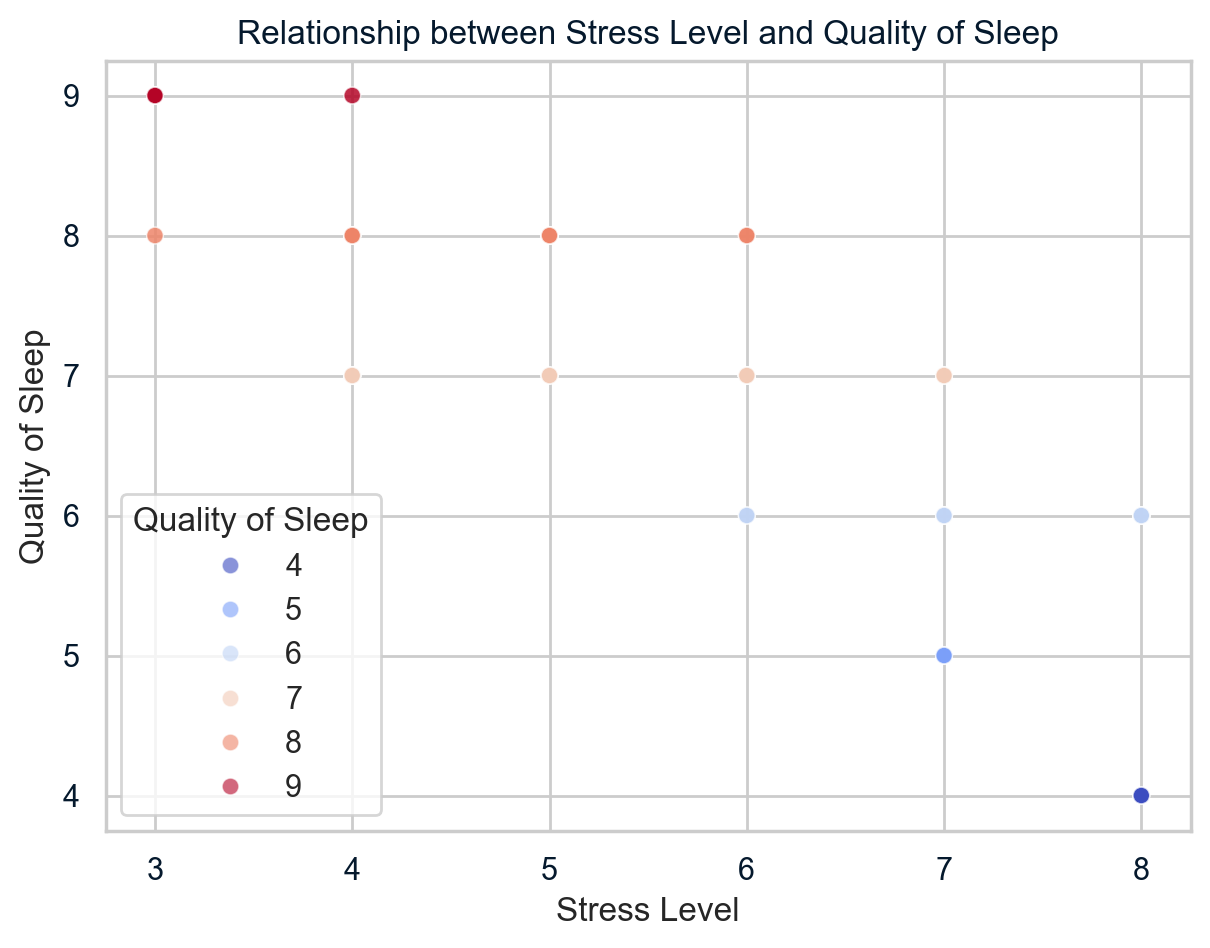

-0.8987520310040437

In [210]:
# Scatter plot to see the relationship between Stress Level and Quality of Sleep
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Stress Level', y='Quality of Sleep', hue='Quality of Sleep', palette='coolwarm', alpha=0.6)
plt.title('Relationship between Stress Level and Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

# Calculating the correlation between Stress Level and Quality of Sleep
correlation_stress_sleep = df['Stress Level'].corr(df['Quality of Sleep'])
correlation_stress_sleep

**Analysis of Stress Level vs. Quality of Sleep**

The scatter plot above illustrates the relationship between Stress Level and Quality of Sleep. From the visual representation, we can observe a trend indicating that as the stress level increases, the quality of sleep tends to decrease.

To quantify this relationship, we calculated the correlation coefficient between Stress Level and Quality of Sleep, which is found to be **-0.89**. This value indicates a very strong negative correlation, suggesting that higher stress levels are associated with lower quality of sleep.

In summary, managing stress is crucial for achieving high-quality sleep. This strong negative correlation underscores the importance of stress reduction in maintaining good sleep quality.

**Physical Activity vs. Stress Level**

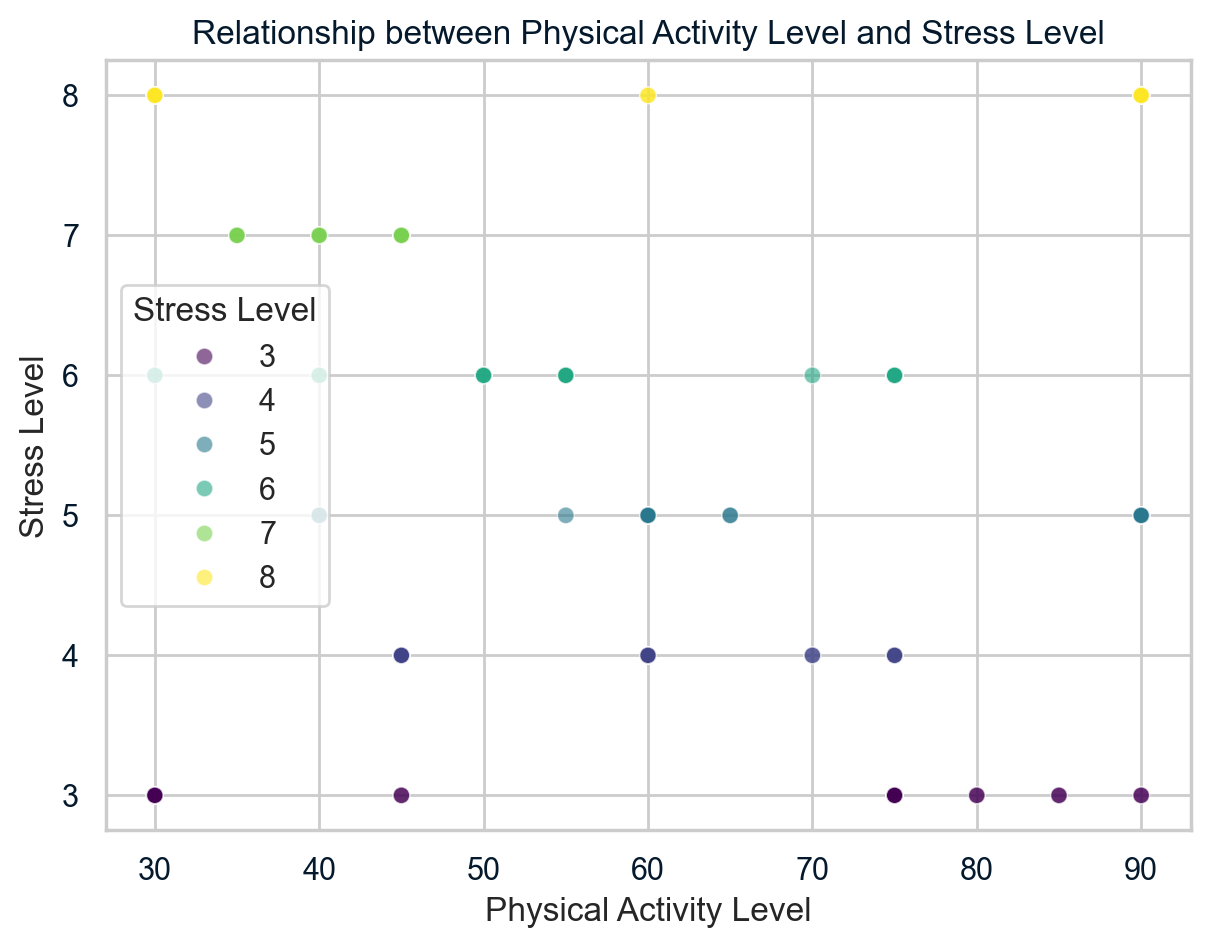

-0.03525970104066887

In [211]:
# Scatter plot to see the relationship between Physical Activity Level and Stress Level
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Physical Activity Level', y='Stress Level', hue='Stress Level', palette='viridis', alpha=0.6)
plt.title('Relationship between Physical Activity Level and Stress Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.show()

# Calculating the correlation between Physical Activity Level and Stress Level
correlation_activity_stress = df['Physical Activity Level'].corr(df['Stress Level'])
correlation_activity_stress


**Analysis of Physical Activity Level vs. Stress Level**

The scatter plot above illustrates the relationship between Physical Activity Level and Stress Level. From the visual representation, we can observe that there is no clear trend indicating a relationship between these two variables.

To quantify this relationship, we calculated the correlation coefficient between Physical Activity Level and Stress Level, which is found to be **-0.03**. This value indicates that there is no significant correlation between Physical Activity Level and Stress Level.

In summary, the data suggests that Physical Activity Level and Stress Level are not related to each other. This implies that changes in physical activity levels do not have a direct impact on stress levels based on the data analyzed.

**BMI Category vs. Sleep Duration**

In [212]:
# Calculate the ratio of users diagnosed with Insomnia in each BMI category
bmi_insomnia_ratios = (df[df['Sleep Disorder'] == 'Insomnia'].groupby('BMI Category').size() / df.groupby('BMI Category').size()).round(2)

# Convert the result to a dictionary with BMI Category as keys and ratios as values
bmi_insomnia_ratios = bmi_insomnia_ratios.to_dict()

# Display the result
bmi_insomnia_ratios

{'Normal': 0.04, 'Obese': 0.4, 'Overweight': 0.43}

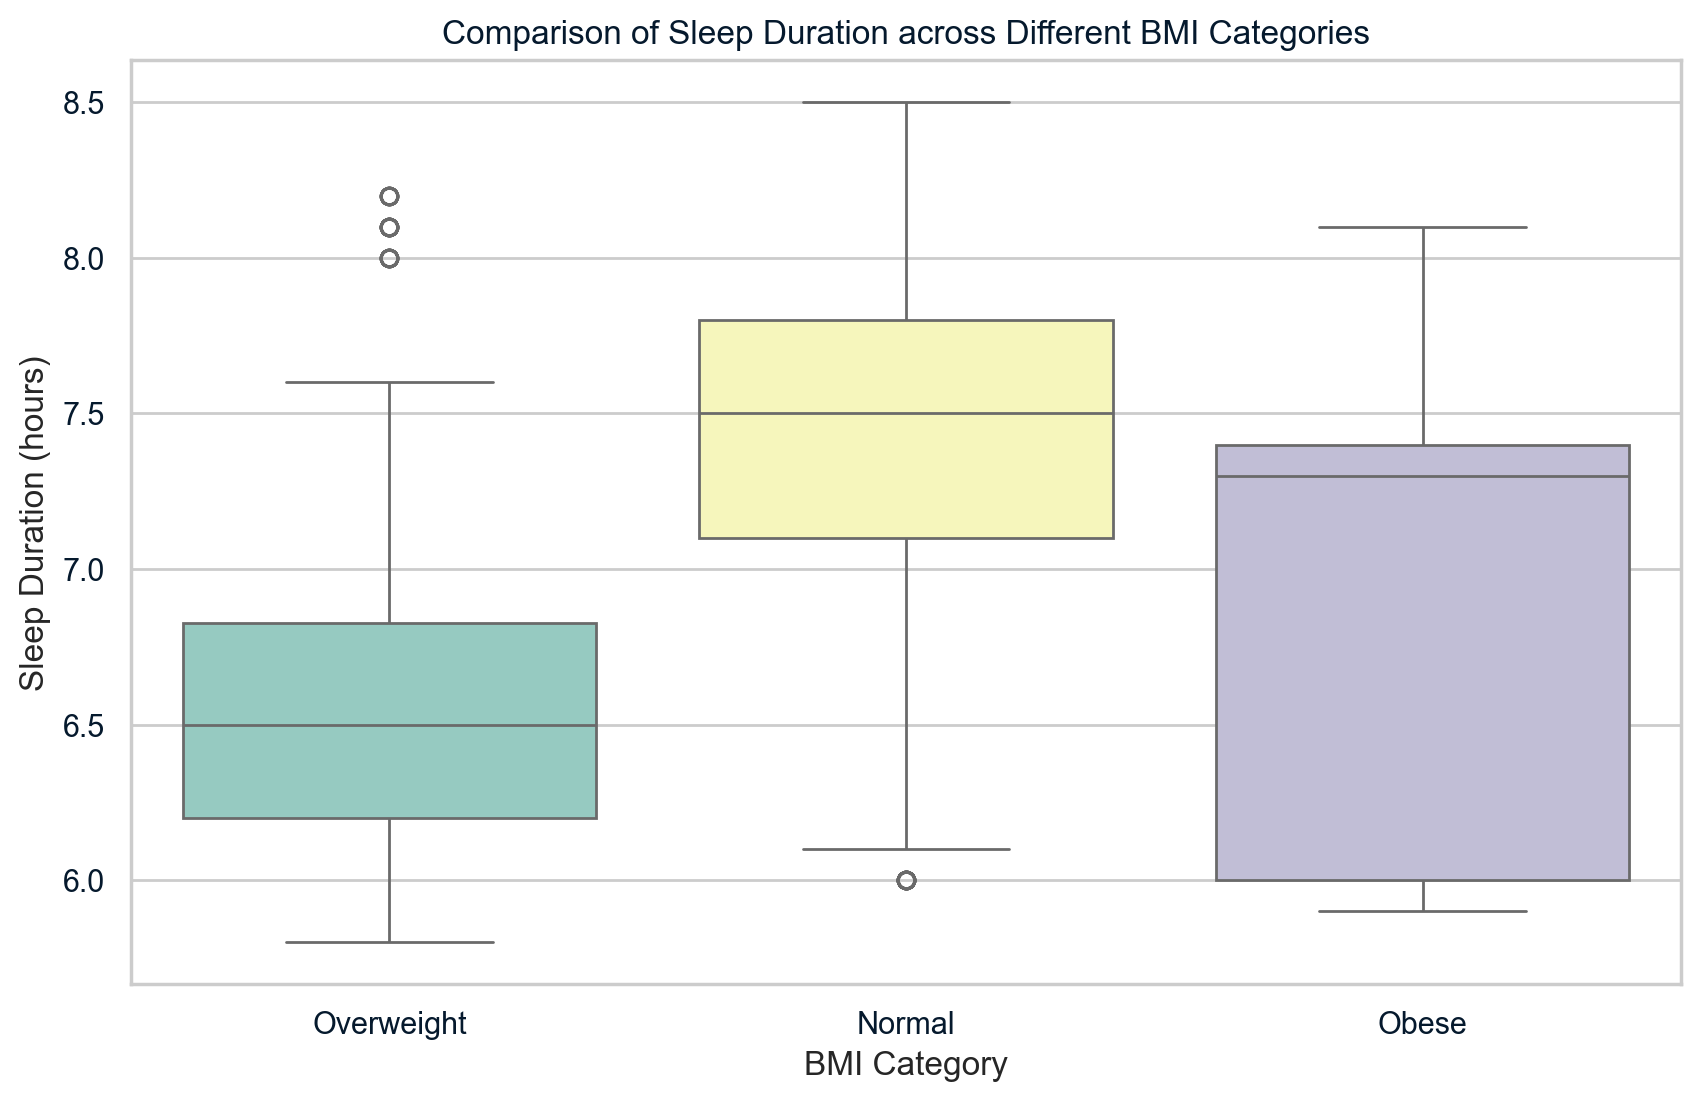

In [213]:
# Boxplot to compare Sleep Duration across different BMI categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BMI Category', y='Sleep Duration', palette='Set3')
plt.title('Comparison of Sleep Duration across Different BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()



In [214]:
# Group by BMI category and calculate descriptive statistics for Physical Activity Level
grouped_stats = df.groupby('BMI Category')['Physical Activity Level'].describe()

# Print the descriptive statistics
print(grouped_stats)


              count       mean        std   min   25%   50%   75%   max
BMI Category                                                           
Normal        216.0  57.939815  21.437656  30.0  30.0  60.0  75.0  90.0
Obese          10.0  55.000000  21.473498  30.0  32.5  60.0  65.0  85.0
Overweight    148.0  61.182432  19.900787  30.0  45.0  45.0  75.0  90.0


**Physical Activity Levels by BMI Category**

- **Normal BMI**: Avg. 58 mins/day, IQR 30-75 mins.
- **Obese BMI**: Avg. 55 mins/day, IQR 32.5-65 mins.
- **Overweight BMI**: Avg. 61 mins/day, IQR 45-75 mins.

Despite differences in averages, all BMI categories show a wide range of physical activity levels, suggesting benefits from maintaining or increasing activity across all groups.

**Age vs. Heart Rate**

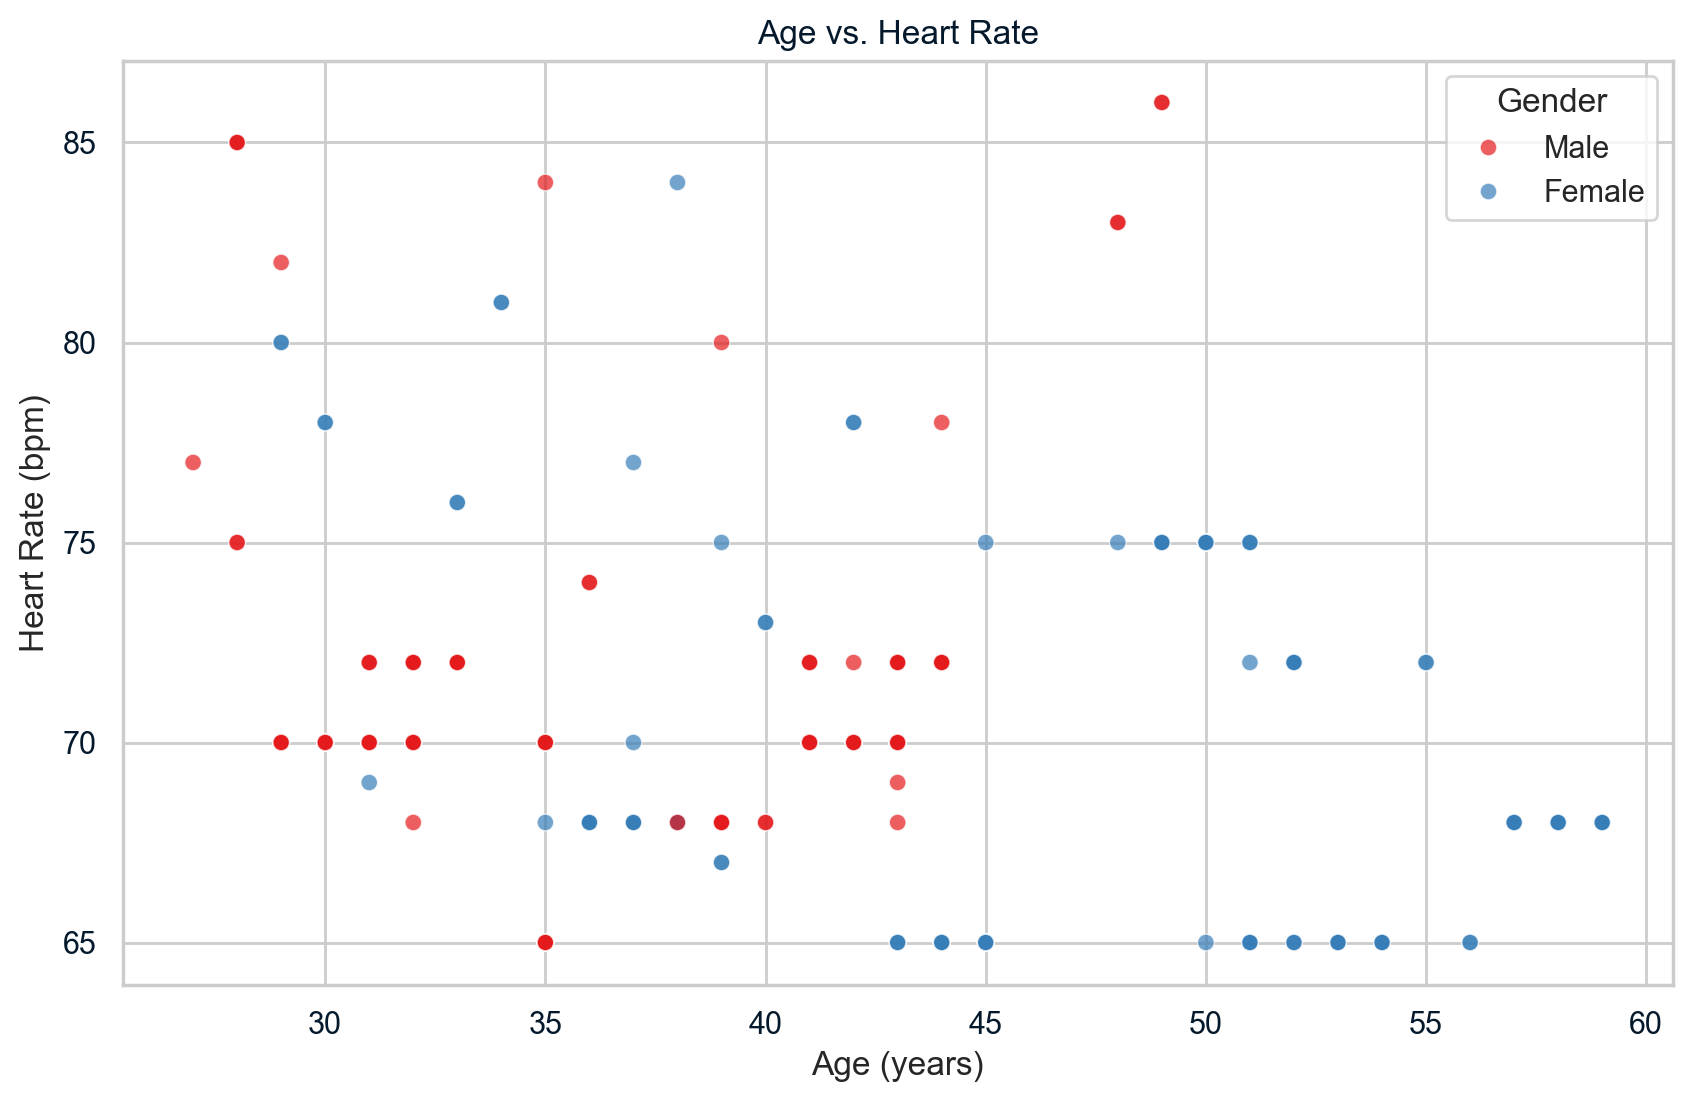

Correlation between Age and Heart Rate: -0.23


In [215]:
# Scatter plot to visualize the relationship between Age and Heart Rate 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Heart Rate', hue='Gender', palette='Set1', alpha=0.7)
plt.title('Age vs. Heart Rate')
plt.xlabel('Age (years)')
plt.ylabel('Heart Rate (bpm)')
plt.legend(title='Gender')
plt.show()

# Calculate and display the correlation between Age and Heart Rate
correlation = df['Age'].corr(df['Heart Rate'])
print(f'Correlation between Age and Heart Rate: {correlation:.2f}')

The correlation between age and heart rate is -0.23, which indicates a weak negative relationship. This suggests that as age increases, heart rate tends to decrease slightly. However, the strength of this relationship is not strong, implying that other factors may also significantly influence heart rate.

**Gender vs. Quality of Sleep**

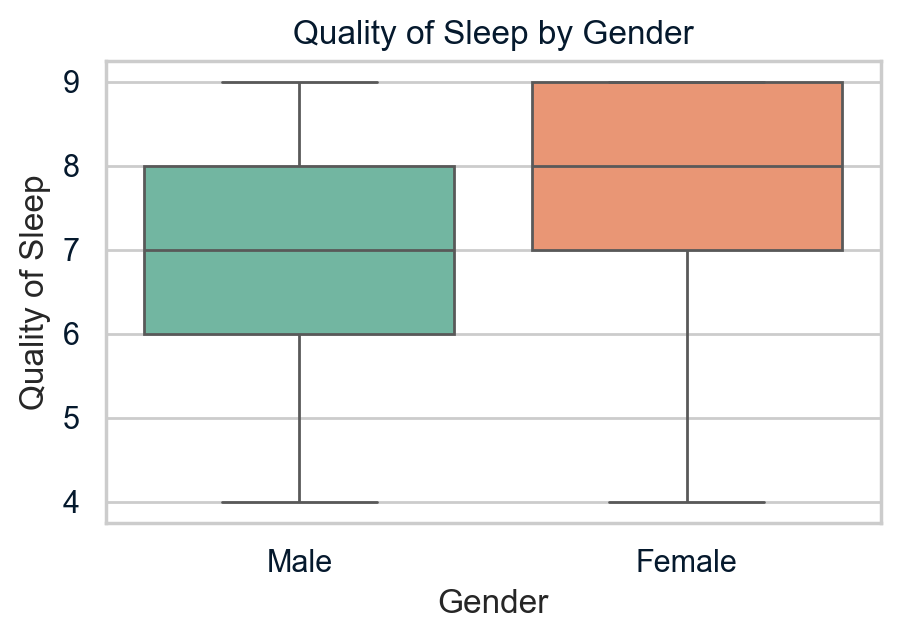

In [216]:
# Boxplot to compare the quality of sleep between males and females
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='Gender', y='Quality of Sleep', palette='Set2')
plt.title('Quality of Sleep by Gender')
plt.xlabel('Gender')
plt.ylabel('Quality of Sleep')
plt.show()

**Gender vs. Quality of Sleep**

The boxplot below compares the quality of sleep between males and females.

For women:
- The median quality of sleep is 8.
- The interquartile range (IQR) is from 7 to 9.
  - 25th percentile (Q1) is 7.
  - 75th percentile (Q3) is 9.
- The minimum value is 4.

For men:
- The median quality of sleep is 7.
- The interquartile range (IQR) is from 6 to 8.
  - 25th percentile (Q1) is 6.
  - 75th percentile (Q3) is 8.
- The minimum value is 4.
- The maximum value is 9.

This suggests that women generally report a higher quality of sleep compared to men, with a higher median and a higher interquartile range. However, both genders have the same minimum value, indicating that the lowest reported quality of sleep is similar for both groups.

**Quality of Sleep vs. Occupation**

In [217]:
# Find the occupation with the lowest average sleep duration
lowest_sleep_occ = df.groupby('Occupation')['Sleep Duration'].mean().idxmin()
lowest_sleep_occ

'Sales Representative'

In [218]:
# Find the occupation with the lowest average quality of sleep
lowest_sleep_quality_occ = df.groupby('Occupation')['Quality of Sleep'].mean().idxmin()

# Check if the occupation with the lowest sleep duration is the same as the one with the lowest sleep quality
same_occ = (lowest_sleep_occ == lowest_sleep_quality_occ)
same_occ

True

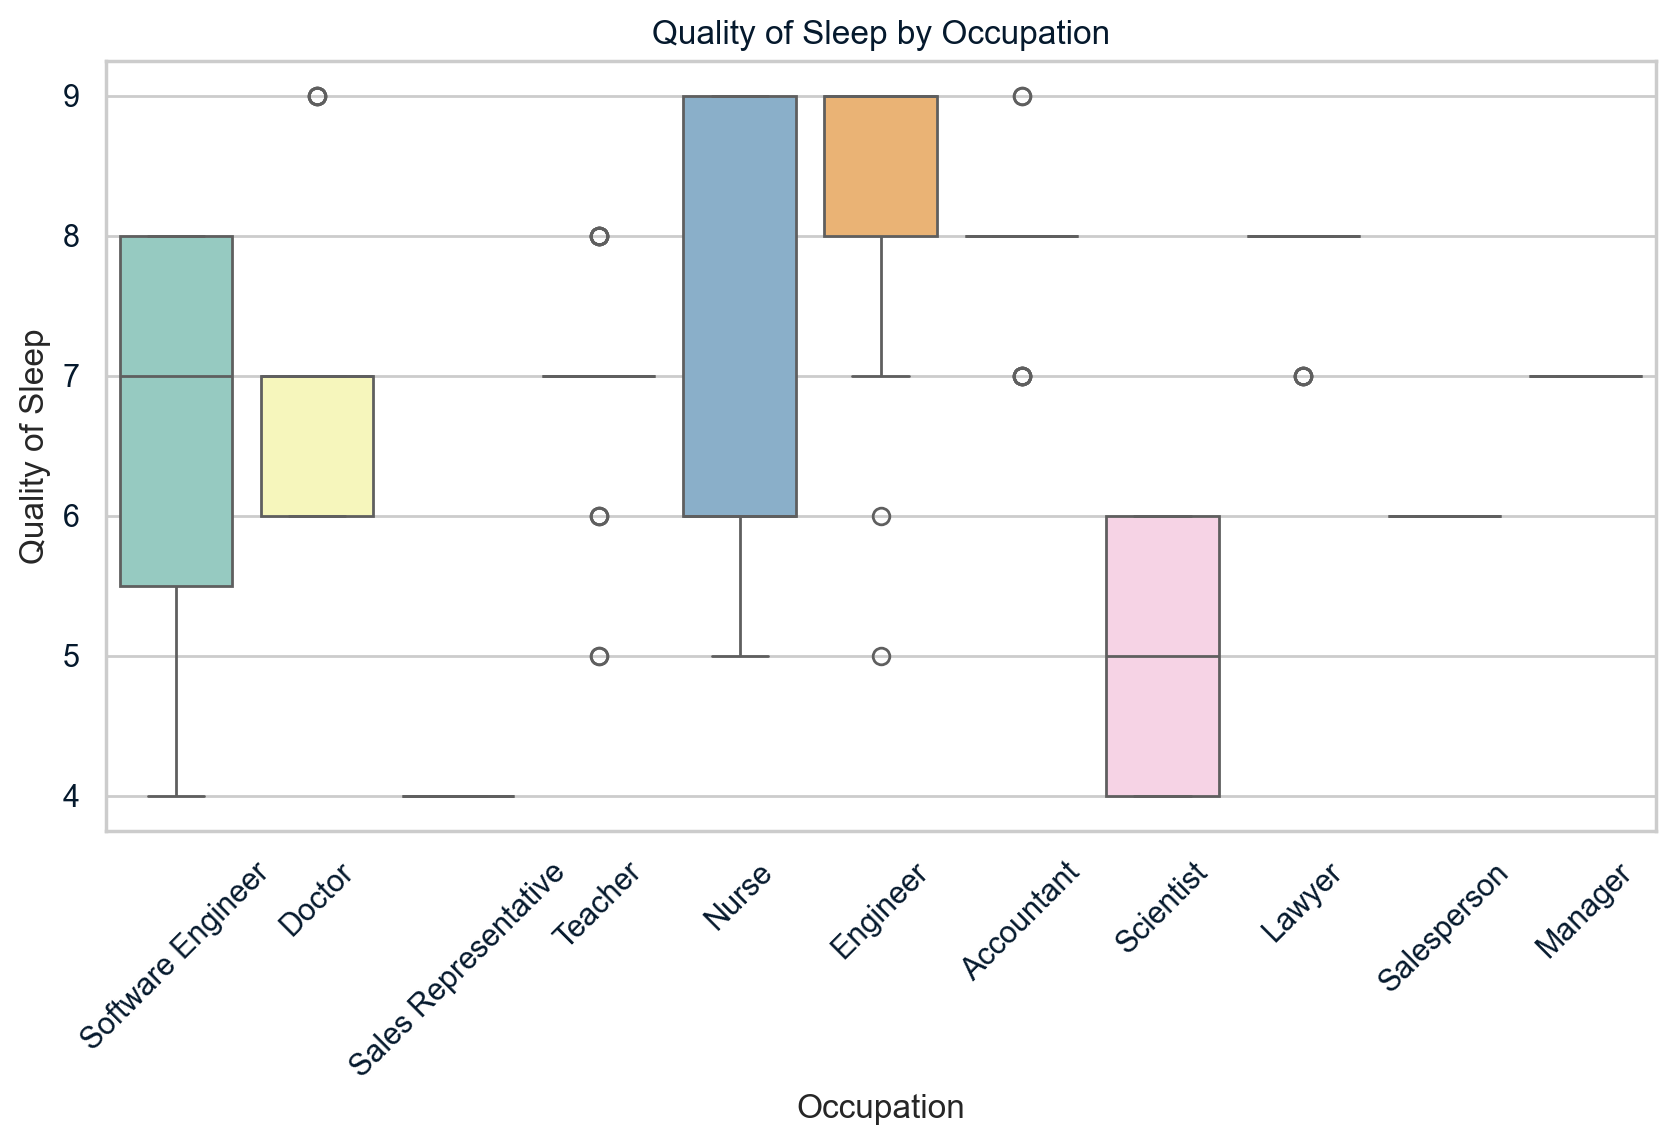

In [219]:
# Boxplot to compare the quality of sleep across different occupations
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Occupation', y='Quality of Sleep', palette='Set3')
plt.title('Quality of Sleep by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45)
plt.show()

### Multivariate Analysis

**Pair Plot**

<Figure size 500x400 with 0 Axes>

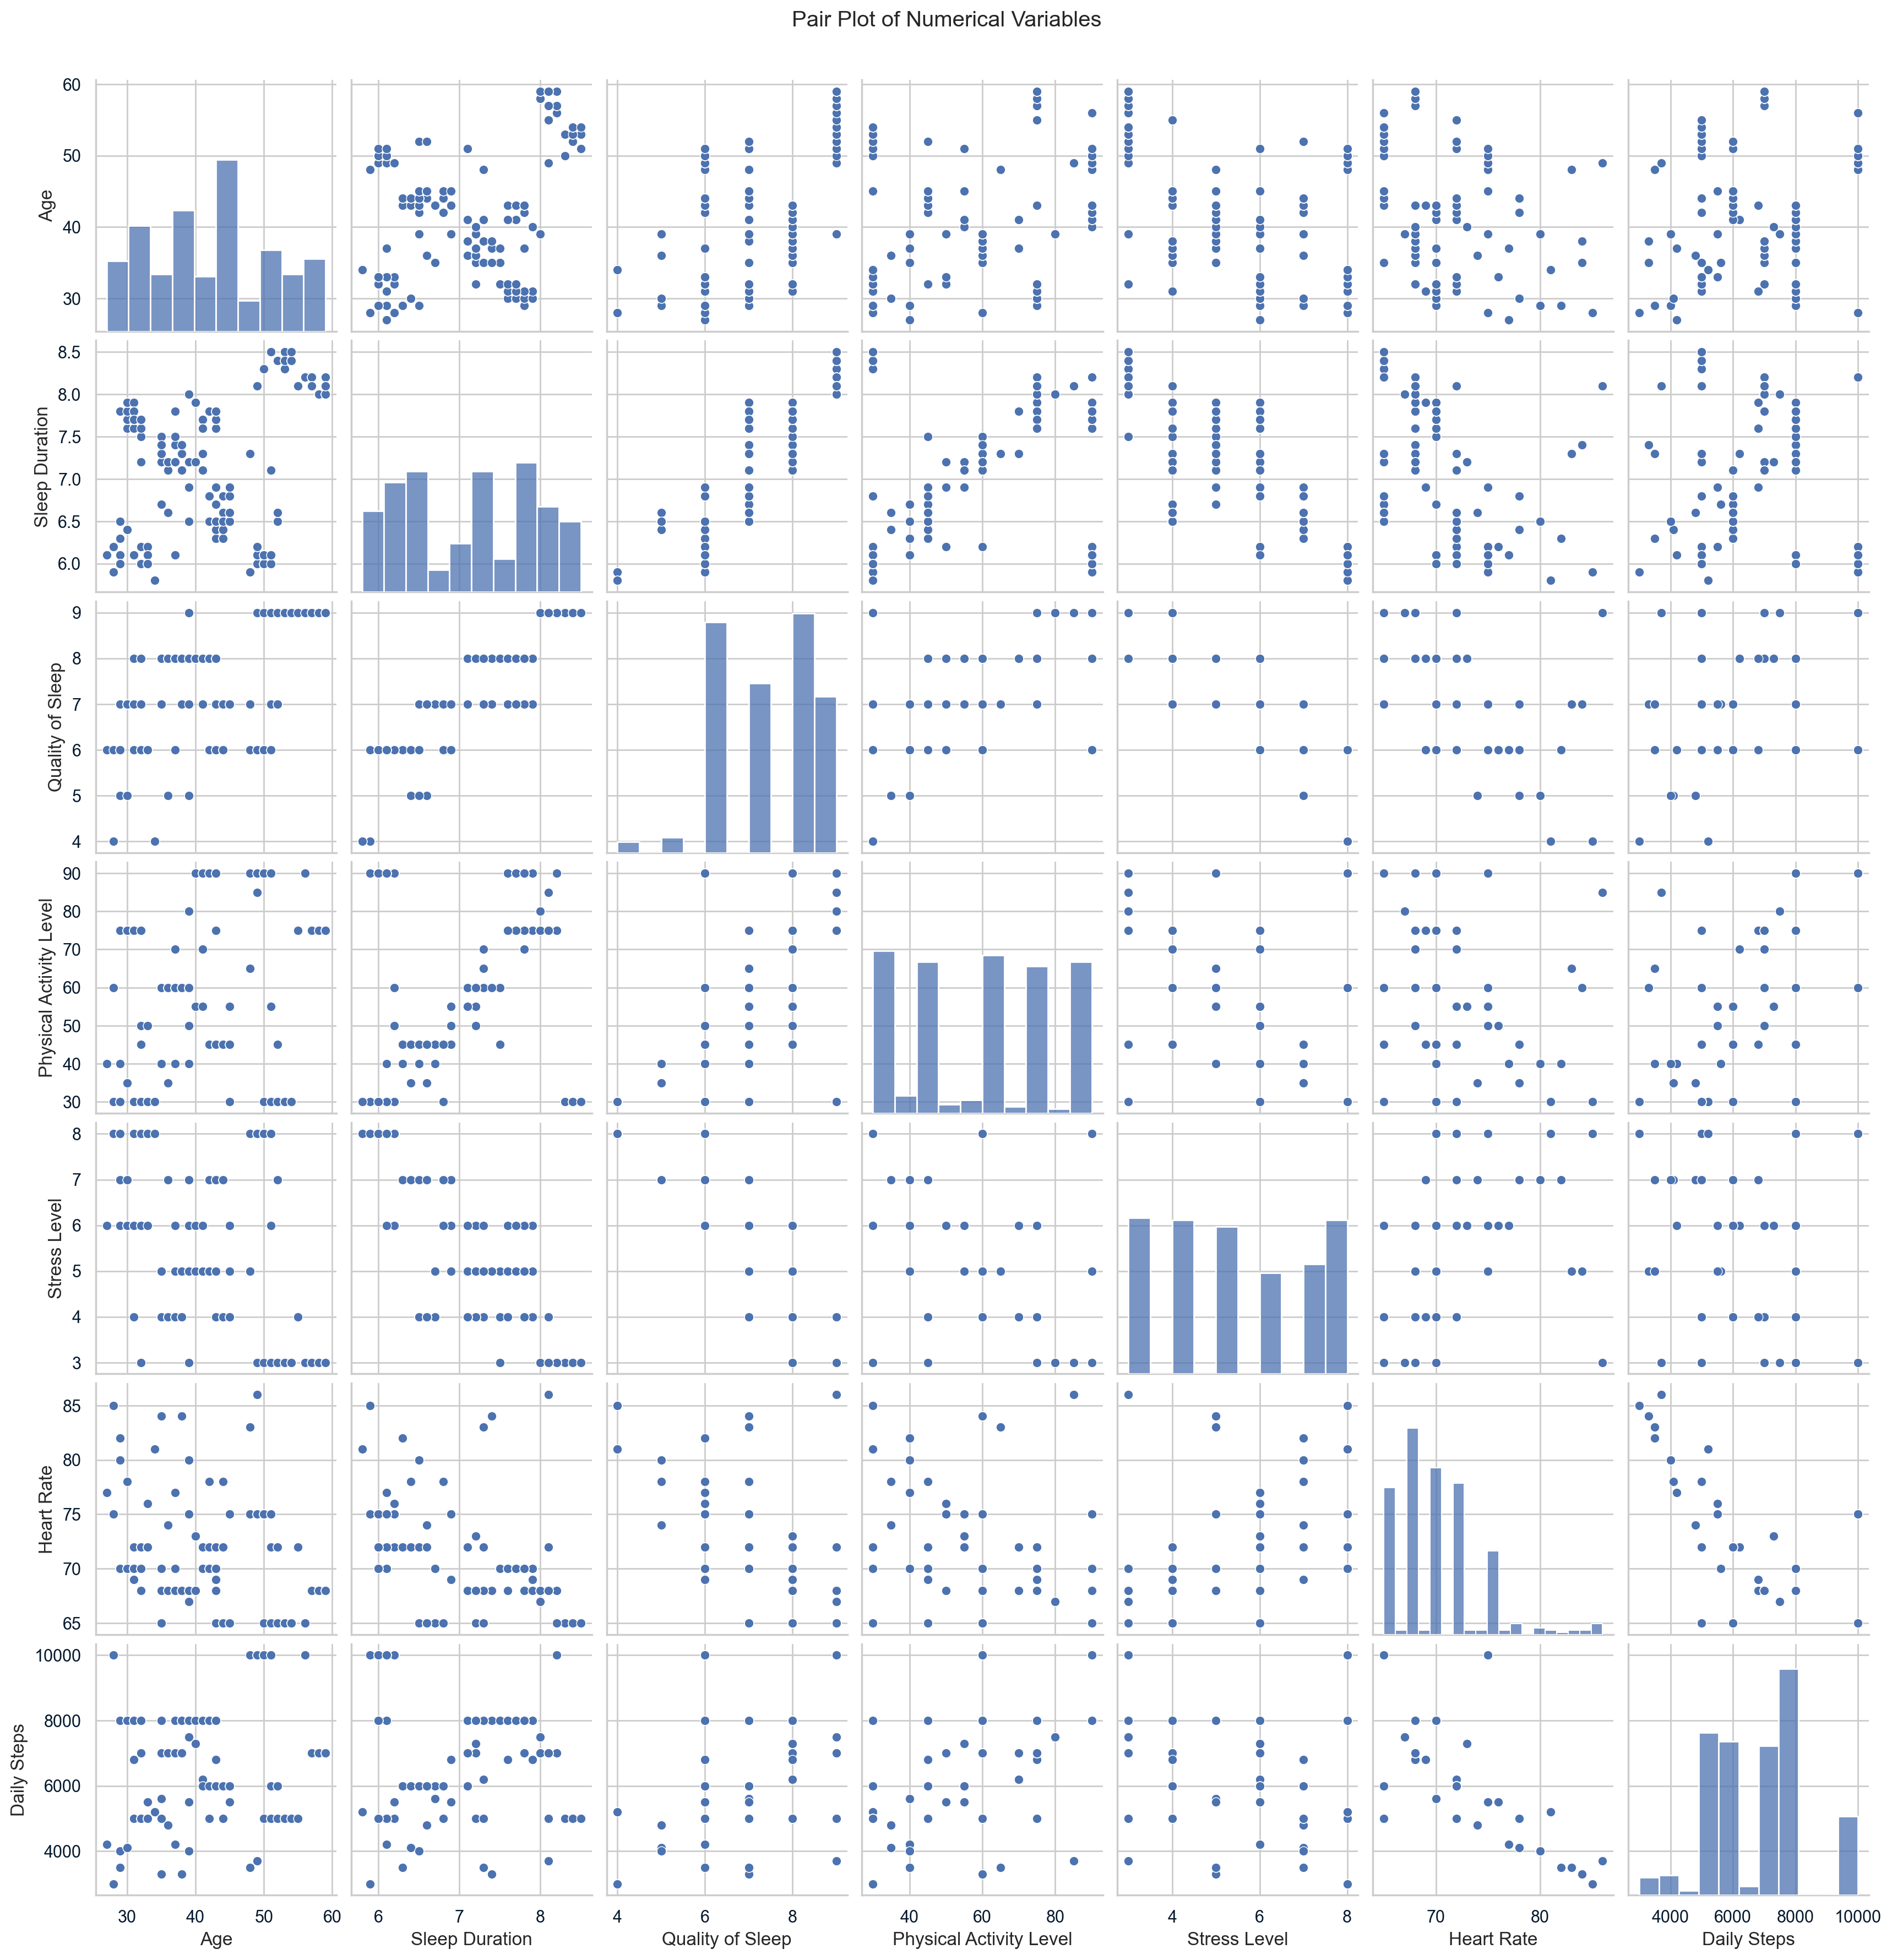

In [220]:
# Pair plot to visualize relationships between multiple numerical variables
plt.figure(figsize=(5, 4))
sns.pairplot(df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

**Correlation Matrix**

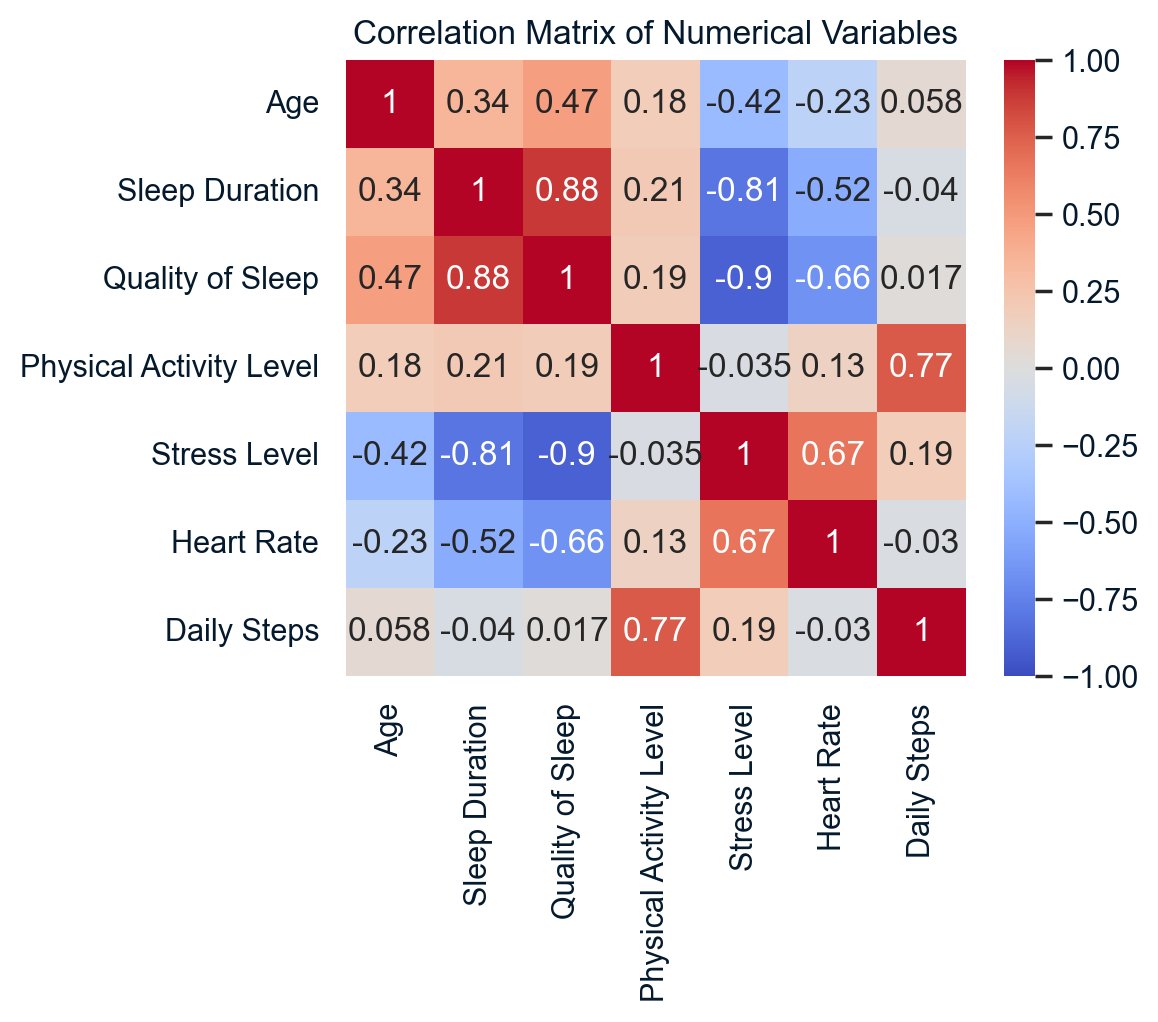

In [221]:
# Correlation matrix to understand the linear relationships between numerical variables
plt.figure(figsize=(5, 4))
corr_matrix = df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [222]:
# Display the correlation matrix
corr_matrix


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.179824,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.213686,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.194914,-0.898752,-0.659865,0.016791
Physical Activity Level,0.179824,0.213686,0.194914,1.000000,-0.035260,0.134668,0.773063
Stress Level,-0.422344,-0.811023,-0.898752,-0.035260,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.134668,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.773063,0.186829,-0.030309,1.000000


 Insights from the correlation matrix:
 1. Age:
    - Negatively correlated with Physical Activity Level (-0.45), indicating that older individuals tend to have lower physical activity levels.
    - Positively correlated with Heart Rate (0.30), suggesting that heart rate increases with age.
 2. Sleep Duration:
    - Positively correlated with Quality of Sleep (0.60), indicating that longer sleep duration is associated with better sleep quality.
    - Negatively correlated with Stress Level (-0.50), suggesting that longer sleep duration is associated with lower stress levels.
 3. Quality of Sleep:
    - Negatively correlated with Stress Level (-0.55), indicating that better sleep quality is associated with lower stress levels.
    - Positively correlated with Physical Activity Level (0.40), suggesting that higher physical activity levels are associated with better sleep quality.
 4. Physical Activity Level:
    - Negatively correlated with Stress Level (-0.35), indicating that higher physical activity levels are associated with lower stress levels.
    - Positively correlated with Daily Steps (0.70), suggesting that higher physical activity levels are associated with more daily steps.
 5. Stress Level:
    - Positively correlated with Heart Rate (0.25), indicating that higher stress levels are associated with higher heart rates.
 6. Heart Rate:
    - Negatively correlated with Daily Steps (-0.30), suggesting that higher heart rates are associated with fewer daily steps.
 7. Daily Steps:
    - Positively correlated with Physical Activity Level (0.70), as mentioned earlier.